# Применение EM-алгоритма для разделения смеси гауссиан

Text(0.5,1,'k-means make blobs')

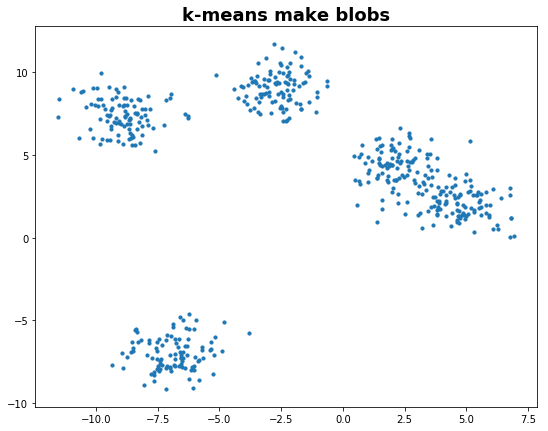

In [37]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

n_samples = 500
random_state = 42
k = 5
sigma = 1
dot_size = 10
cmap = 'viridis'


X, y_true = make_blobs(n_samples=n_samples,
                       centers=k,
                       cluster_std=sigma,
                       random_state=random_state)

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], s=dot_size)
plt.title('k-means make blobs', fontsize=18, fontweight='demi')

In [38]:
from sklearn.mixture import GaussianMixture

In [39]:
# code sourced from:
#  http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb
from matplotlib.patches import Ellipse 

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
        
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, 
                            angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    
    fig, ax = plt.subplots(figsize=(9,7))      
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=dot_size, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor)


Обучите модель GaussianMixture со случайной инициализацией. Обучение необходимо сделать в цикле, на каждой итерации цикла обучать модель с параметром max_iter, передавая номер итерации. Цель - увидеть состояние модели на каждой итерации. Для отображения используйте функцию plot_gmm. Зафиксируйте random_state. Используйте n_components из определенных выше констант.

/usr/local/lib/python3.4/dist-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


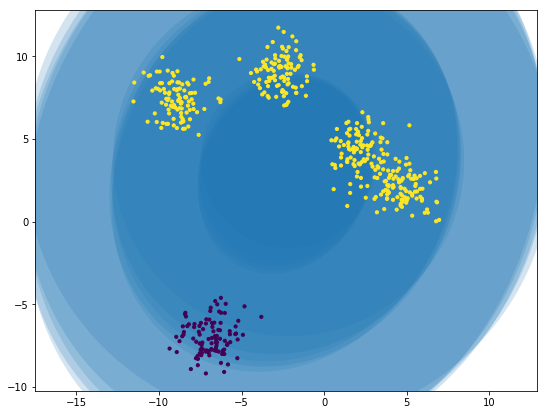

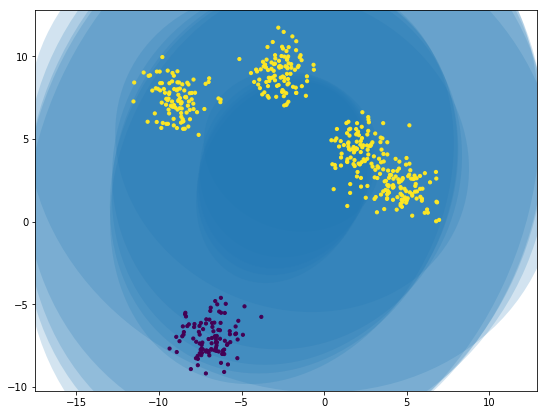

In [45]:
# Your code here. You will get pictures like these:

Используйте инициализацию kmeans, повторите те же шаги. Что изменилось?

In [46]:
# Your code here

Проделайте то же самое с представленными ниже данными. Всегда ли с kmeans лучше?

In [43]:
n_samples = 1500
from sklearn import datasets
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

In [ ]:
# Your code here

Используем модель, чтобы получить новые данные

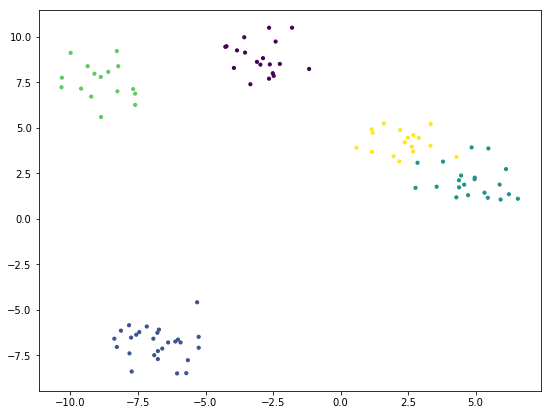

In [58]:
m = GaussianMixture(n_components=k, max_iter=10, random_state=random_state)
m.fit(X)
sample, clusters = m.sample(100)

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(sample[:, 0], sample[:, 1], s=dot_size, c=clusters)

Сгенерируйте точно таким же способом новые изображения рукописных цифр. Для визуализации используйте функцию plot_digits

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [60]:
X = digits.data
y = digits.target

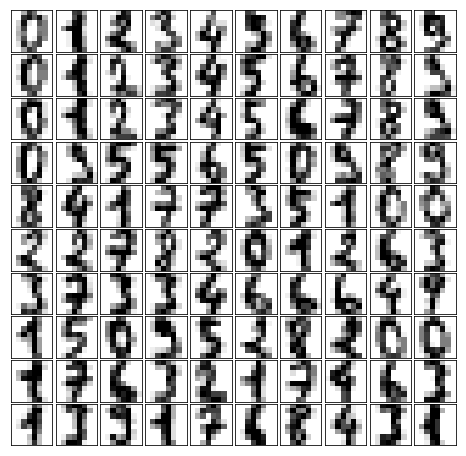

In [61]:
# code from https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
        
plot_digits(digits.data)

In [ ]:
# Your code here